In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.test.is_built_with_cuda())

TensorFlow version: 2.6.0
CUDA version: True


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
!pip install pandas==1.3.2
!pip install numpy==1.19.5
!pip install matplotlib==3.4.2
!pip install keras==2.6.0
!pip install pillow==8.3.1
!pip install scikit-learn==0.24.2



  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.6.0 which is incompatible.


In [5]:
!pip install numpy==1.19.5

  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.6.0 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [6]:
!pip install matplotlib==3.4.2

In [7]:
!pip install keras==2.6.0

In [8]:
!pip install scikit-learn==0.24.2

In [9]:
!pip install keras==2.6.0 tensorflow==2.6.o





ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.o (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.6.o


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

## making labels and creating filenames in array

In [12]:
labels_csv = pd.read_csv("crnAndName.csv")
print(labels_csv.describe())
print(labels_csv.head())

                 CRN       Full Name
count             32              32
unique            32              32
top     NCE075BCT002  AAKRITI DHAKAL
freq               1               1
            CRN          Full Name
0  NCE075BCT002     AAKRITI DHAKAL
1  NCE075BCT003       AASHISH SHAH
2  NCE075BCT004    AAYUSH ADHIKARI
3  NCE075BCT005  ANILA BAJRACHARYA
4  NCE075BCT006       PEMILA LIMBU


In [13]:
# convert labels column to NumPy array
unique_labels=labels_csv['CRN'].to_numpy()
unique_labels

array(['NCE075BCT002', 'NCE075BCT003', 'NCE075BCT004', 'NCE075BCT005',
       'NCE075BCT006', 'NCE075BCT007', 'NCE075BCT008', 'NCE075BCT009',
       'NCE075BCT010', 'NCE075BCT011', 'NCE075BCT012', 'NCE075BCT013',
       'NCE075BCT014', 'NCE075BCT015', 'NCE075BCT016', 'NCE075BCT017',
       'NCE075BCT018', 'NCE075BCT019', 'NCE075BCT020', 'NCE075BCT021',
       'NCE075BCT023', 'NCE075BCT024', 'NCE075BCT025', 'NCE075BCT026',
       'NCE075BCT027', 'NCE075BCT028', 'NCE075BCT029', 'NCE075BCT031',
       'NCE075BCT032', 'NCE075BCT033', 'NCE075BCT034', 'NCE075BCT035'],
      dtype=object)

In [14]:
import os
filedir=["data/"+crn for crn in unique_labels]
filedir[:5]

['data/NCE075BCT002',
 'data/NCE075BCT003',
 'data/NCE075BCT004',
 'data/NCE075BCT005',
 'data/NCE075BCT006']

In [15]:
filenames=[]
labels=[]
for dir in filedir:
    files=os.listdir(dir)
    for file in files:
        filetemp=dir+'/'+file
        filenames.append(filetemp)
        labels.append(dir[5:])

In [16]:
#checking files and labels available
print(len(filenames))
len((labels))

10560


10560

In [17]:
#checking labels and file name
print(filenames[:5])
print(labels[:5])

['data/NCE075BCT002/aakriti (1).jpg', 'data/NCE075BCT002/aakriti (1)_B_0.5.jpg', 'data/NCE075BCT002/aakriti (1)_B_1.0.jpg', 'data/NCE075BCT002/aakriti (1)_B_1.5.jpg', 'data/NCE075BCT002/aakriti (1)_C_0.5.jpg']
['NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002']


In [18]:
np_labels=np.asarray(labels)
print(np_labels)
type(np_labels)

['NCE075BCT002' 'NCE075BCT002' 'NCE075BCT002' ... 'NCE075BCT035'
 'NCE075BCT035' 'NCE075BCT035']


numpy.ndarray

In [19]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_labels # use comparison operator to create boolean array

NCE075BCT002


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [20]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[-2:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True])]

In [21]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

NCE075BCT002
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## creating validation list in small data

In [22]:
# Setup X & y variables
X = filenames
y = np_labels

In [23]:
# Set number of images to use for experimenting
NUM_IMAGES = 500 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

500

In [24]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8448, 8448, 2112, 2112)

In [25]:
X_train[:5], y_train[:5]

(['data/NCE075BCT003/aashish (1)_0_1677692463_B_1.5.jpg',
  'data/NCE075BCT006/pemila (7)_0_1677692542_C_1.5.jpg',
  'data/NCE075BCT024/rojal (1)_B_0.5_C_1.5.jpg',
  'data/NCE075BCT004/aayush (23).jpg',
  'data/NCE075BCT002/face_1_1677690293_B_1.0.jpg'],
 array(['NCE075BCT003', 'NCE075BCT006', 'NCE075BCT024', 'NCE075BCT004',
        'NCE075BCT002'], dtype='<U12'))

## Preprocessing images (turning images into Tensors)

In [26]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0]) # read in an image
image.shape

(594, 440, 3)

In [27]:
#tf.constant convert list into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 440, 3), dtype=uint8, numpy=
array([[[29, 20, 21],
        [27, 18, 19],
        [30, 21, 22],
        ...,
        [80, 60, 49],
        [77, 55, 42],
        [77, 55, 42]],

       [[33, 24, 25],
        [33, 24, 25],
        [34, 25, 26],
        ...,
        [83, 64, 50],
        [80, 58, 45],
        [78, 56, 43]]], dtype=uint8)>

In [28]:
# Define image size
IMG_SIZE = 160

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches

In [29]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [30]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# filenames                                                 
        data = data.shuffle(buffer_size=facelen(x))
# Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [31]:
# Create training and validation data batches
train_data = create_data_batches(X_train,test_data=True)
val_data = create_data_batches(X_val,test_data=True)

Creating test data batches...
Creating test data batches...


In [32]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None))

## Visualizing data batches

In [33]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")

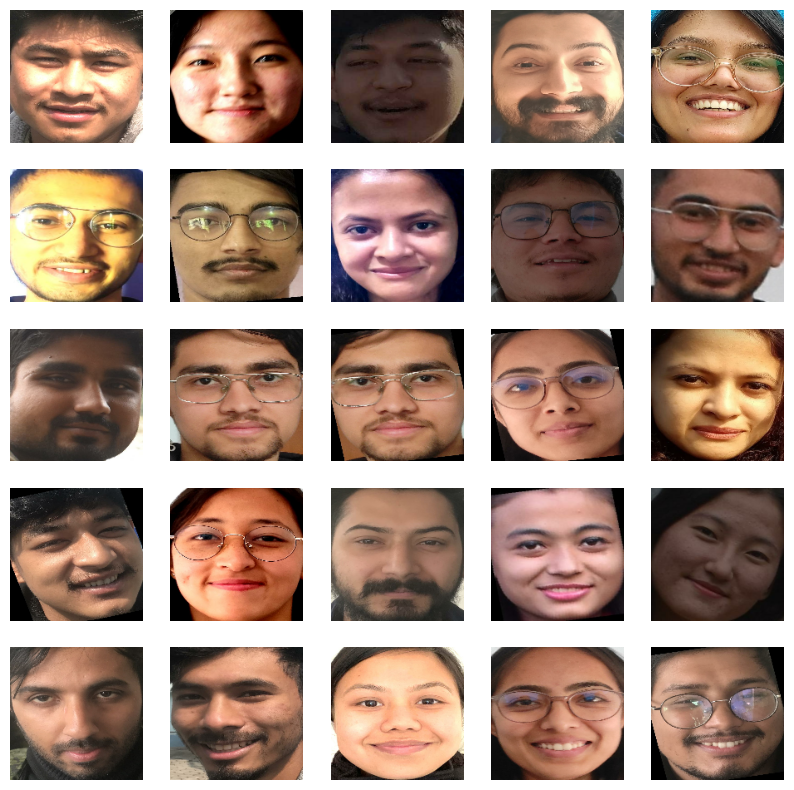

In [34]:
# Visualize training images from the training data batch
train_images = next(train_data.as_numpy_iterator())
show_25_images(train_images)

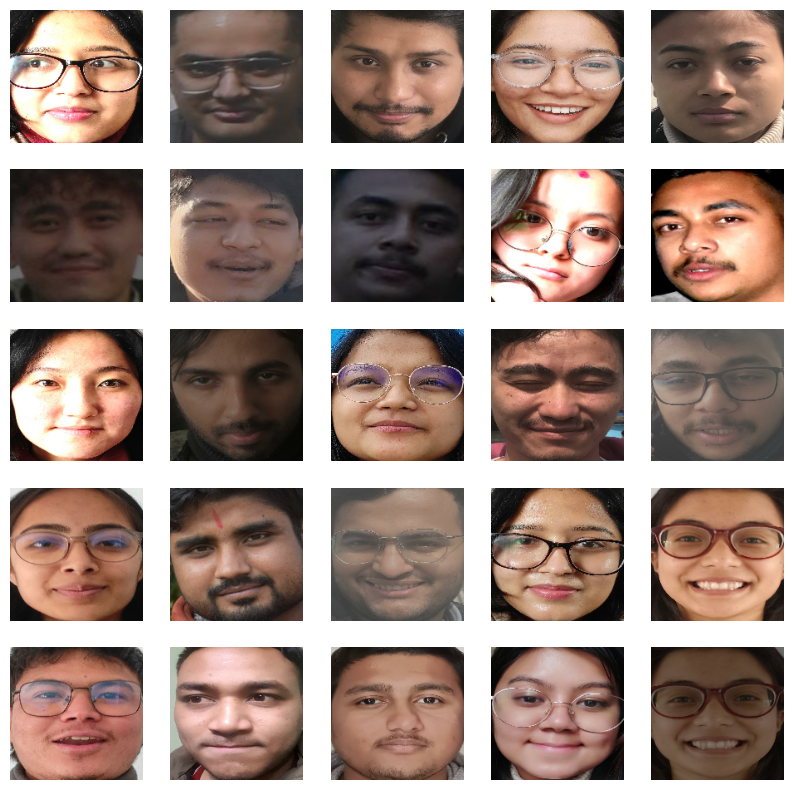

In [35]:
# Visualize validation images from the validation data batch
val_images=next(val_data.as_numpy_iterator())
show_25_images(val_images)

## Building a model

In [36]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [37]:
INPUT_SHAPE

[None, 160, 160, 3]

In [38]:
#find embeddings
model = load_model('model/facenet_keras.h5')
X_train_emb = model.predict(train_data)
X_val_emb = model.predict(val_data)

In [39]:
# we have embedding of images
X_train_emb.shape

(8448, 128)

In [40]:
X_val_emb.shape

(2112, 128)

In [41]:
X_train_emb

array([[ 6.2538552e-01, -6.5872222e-02, -1.4563110e+00, ...,
         2.4355534e-01,  1.1925707e+00, -1.1412129e-03],
       [ 8.6828256e-01, -9.4792271e-01,  1.1680400e+00, ...,
        -1.2694911e+00, -9.1872466e-01,  2.9843238e-01],
       [ 2.3893993e-01, -7.3617983e-01, -1.7874203e+00, ...,
        -1.2983100e+00,  2.3329086e+00,  4.9217728e-01],
       ...,
       [-2.5153747e-01, -1.3900981e+00,  8.6034203e-01, ...,
        -1.5850815e-01, -7.2761786e-01, -1.8974519e-01],
       [ 8.7482727e-01,  2.0402509e-01, -2.5908467e-01, ...,
        -3.1475025e-01,  1.6155248e+00,  6.9537330e-01],
       [ 5.0462043e-01, -1.7230326e-01, -1.5390472e+00, ...,
        -5.5828595e-01,  1.4428983e+00,  3.1172511e-01]], dtype=float32)

In [42]:
X_val_emb

array([[ 0.39683554, -0.9542774 ,  1.0050628 , ...,  1.0445188 ,
         1.0334466 , -0.6730186 ],
       [ 0.76737714, -0.14713104, -0.4434598 , ..., -0.06982724,
        -0.3020452 , -0.39266738],
       [ 1.083986  , -0.971406  , -2.2152984 , ..., -0.30908284,
        -0.59804124,  0.52559805],
       ...,
       [ 0.9936049 , -0.3455054 , -1.131628  , ..., -1.39939   ,
         0.89775544, -1.2271696 ],
       [-0.84368455,  0.66971004, -0.19423999, ..., -0.37731916,
        -0.43874043, -1.2015529 ],
       [ 0.35631755,  1.3646848 ,  1.2506763 , ..., -0.7373448 ,
        -0.8833914 ,  1.1543413 ]], dtype=float32)

## now svc 

In [43]:
#normalize the embedded data
in_encode = Normalizer(norm='l2')
X_train_emb_nom = in_encode.transform(X_train_emb)
X_val_emb_nom = in_encode.transform(X_val_emb)

In [44]:
X_train_emb_nom,X_train_emb_nom.shape,type(X_train_emb_nom)

(array([[ 5.06975465e-02, -5.34000201e-03, -1.18057407e-01, ...,
          1.97440740e-02,  9.66770202e-02, -9.25136410e-05],
        [ 8.03742334e-02, -8.77462775e-02,  1.08121857e-01, ...,
         -1.17512867e-01, -8.50434974e-02,  2.76249629e-02],
        [ 2.00195331e-02, -6.16806746e-02, -1.49758637e-01, ...,
         -1.08778641e-01,  1.95462272e-01,  4.12369706e-02],
        ...,
        [-2.04289313e-02, -1.12898558e-01,  6.98737577e-02, ...,
         -1.28734382e-02, -5.90943992e-02, -1.54103935e-02],
        [ 6.83405399e-02,  1.59382150e-02, -2.02394091e-02, ...,
         -2.45879441e-02,  1.26203015e-01,  5.43217957e-02],
        [ 4.14831117e-02, -1.41644580e-02, -1.26519784e-01, ...,
         -4.58947681e-02,  1.18615702e-01,  2.56258491e-02]], dtype=float32),
 (8448, 128),
 numpy.ndarray)

In [45]:
y_train

array(['NCE075BCT003', 'NCE075BCT006', 'NCE075BCT024', ...,
       'NCE075BCT018', 'NCE075BCT004', 'NCE075BCT025'], dtype='<U12')

In [46]:
#define svm classifier model new variable C=CLoseness aaded
model_svc =SVC(kernel='poly',degree=5, probability=True,C=100)
model_svc.fit(X_train_emb_nom,y_train)

SVC(C=100, degree=5, kernel='poly', probability=True)

In [47]:
model_svc.score(X_train_emb_nom,y_train)

1.0

In [48]:
model_svc.score(X_val_emb_nom,y_val)

1.0

In [49]:
y_preds=model_svc.predict(X_val_emb_nom)

In [50]:
model_svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [51]:
from sklearn.model_selection import GridSearchCV
grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': ['balanced',None],'C': [ 1,10,100,200]}
model_svc_best=GridSearchCV(estimator=model_svc,param_grid=grid,cv=5,verbose=2)
model_svc_best.fit(X_train_emb_nom,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   1.5s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   1.6s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   1.5s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   1.5s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   1.5s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=   4.2s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=   4.4s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=   4.3s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=   4.3s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=   4.2s
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time=   3.3s
[CV] END .............C=1, class_weight=balance

[CV] END ............C=100, class_weight=None, kernel=linear; total time=   1.3s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   1.2s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   1.2s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   1.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=   4.1s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=   4.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=   4.1s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=   4.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=   4.1s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   3.0s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   3.1s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   3.1s
[CV] END ...............C=10

GridSearchCV(cv=5,
             estimator=SVC(C=100, degree=5, kernel='poly', probability=True),
             param_grid={'C': [1, 10, 100, 200],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [52]:
model_svc_best.best_estimator_

SVC(C=100, class_weight='balanced', degree=5, probability=True)

In [53]:
from sklearn.metrics import precision_score
## precesion=tp / (tp + fp)
print(precision_score(y_val, y_preds, average='macro'))
print(precision_score(y_val, y_preds, average='micro'))
print(precision_score(y_val, y_preds, average='weighted'))

1.0
1.0
1.0


In [54]:
from sklearn.metrics import recall_score
print(recall_score(y_val, y_preds, average='macro'))
print(recall_score(y_val, y_preds, average='micro'))
print(recall_score(y_val, y_preds, average='weighted'))

1.0
1.0
1.0


In [55]:
#F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
print(f1_score(y_val, y_preds, average='macro'))
print(f1_score(y_val, y_preds, average='micro'))
print(f1_score(y_val, y_preds, average='weighted'))

1.0
1.0
1.0


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat=confusion_matrix(y_val,y_preds)
print('Confusion matrix : \n',conf_mat)

Confusion matrix : 
 [[66  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 66]]


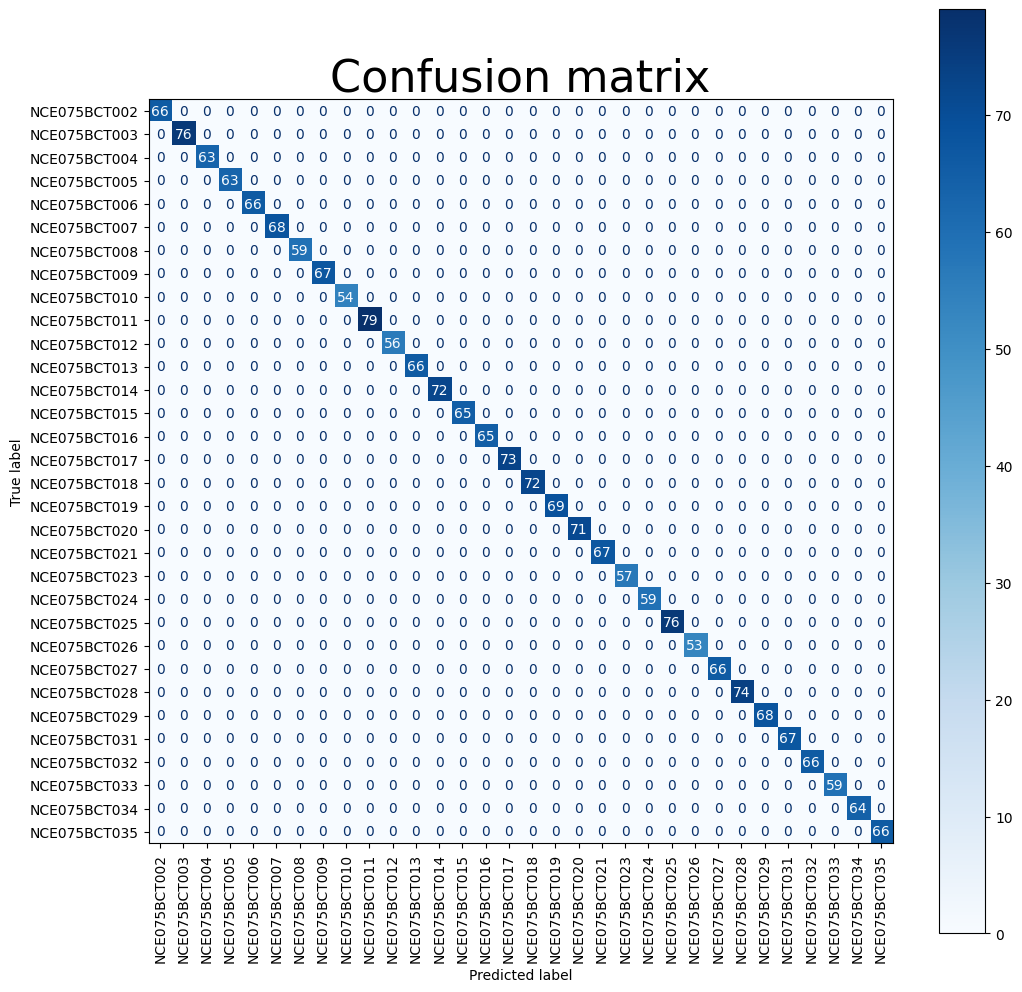

In [57]:
from sklearn.metrics import plot_confusion_matrix
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(model_svc, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# RANDOM FOREST

In [58]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=10)

In [59]:
#Train the model using the training sets y_pred=clf.predict(X_test)
randomforest.fit(X_train_emb_nom,y_train)

RandomForestClassifier(n_estimators=10)

In [60]:
#predict
y_preds_rf=randomforest.predict(X_val_emb_nom)

In [61]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_rf))

Accuracy: 0.9971590909090909


In [62]:
#precision 
print(precision_score(y_val, y_preds_rf, average='macro'))
print(precision_score(y_val, y_preds_rf, average='micro'))
print(precision_score(y_val, y_preds_rf, average='weighted'))

0.997181763612505
0.9971590909090909
0.9971947245223796


In [63]:
print(recall_score(y_val, y_preds_rf, average='macro'))
print(recall_score(y_val, y_preds_rf, average='micro'))
print(recall_score(y_val, y_preds_rf, average='weighted'))

0.9969490467602499
0.9971590909090909
0.9971590909090909


In [64]:
print(f1_score(y_val, y_preds_rf, average='macro'))
print(f1_score(y_val, y_preds_rf, average='micro'))
print(f1_score(y_val, y_preds_rf, average='weighted'))

0.9970454319382689
0.9971590909090909
0.9971581951035912


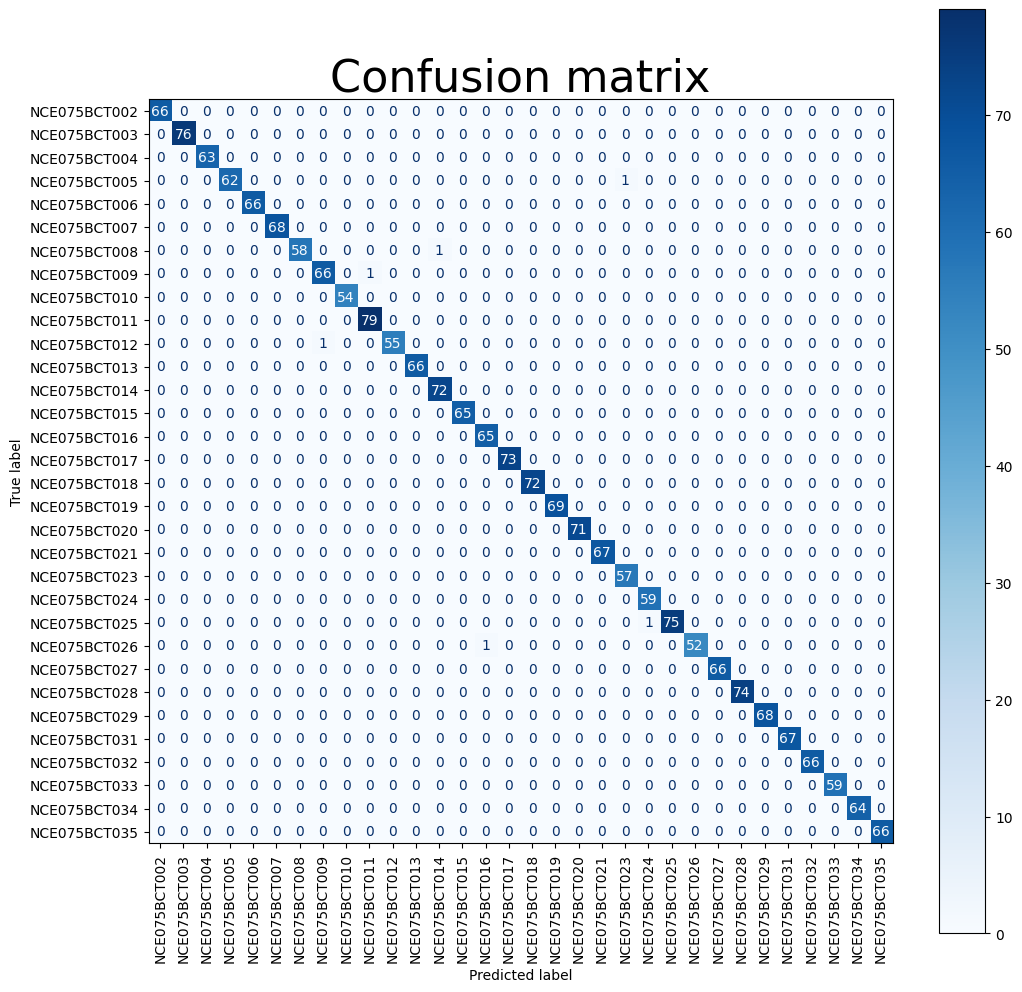

In [65]:
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(randomforest, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# Knn algorithm

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knnNeigh = KNeighborsClassifier(n_neighbors=5)
knnNeigh.fit(X_train_emb_nom,y_train)

KNeighborsClassifier()

In [67]:
y_preds_knn=knnNeigh.predict(X_val_emb_nom)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_knn))

Accuracy: 0.9976325757575758


In [69]:
#precision 
print(precision_score(y_val, y_preds_knn, average='macro'))
print(precision_score(y_val, y_preds_knn, average='micro'))
print(precision_score(y_val, y_preds_knn, average='weighted'))

0.9975498589846897
0.9976325757575758
0.9976696991062927


In [70]:
##recall
print(recall_score(y_val, y_preds_knn, average='macro'))
print(recall_score(y_val, y_preds_knn, average='micro'))
print(recall_score(y_val, y_preds_knn, average='weighted'))

0.9977001304884687
0.9976325757575758
0.9976325757575758


In [71]:
#f1 score
print(f1_score(y_val, y_preds_knn, average='macro'))
print(f1_score(y_val, y_preds_knn, average='micro'))
print(f1_score(y_val, y_preds_knn, average='weighted'))

0.9976083699687979
0.9976325757575758
0.997633988947606


# logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0,penalty='l2').fit(X_train_emb_nom,y_train)
y_preds_lr=logisticReg.predict(X_val_emb_nom)
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_lr))

Accuracy: 0.9976325757575758


In [73]:
#precision 
print(precision_score(y_val, y_preds_lr, average='macro'))
print(precision_score(y_val, y_preds_lr, average='micro'))
print(precision_score(y_val, y_preds_lr, average='weighted'))

0.9975401588890959
0.9976325757575758
0.9976997181965426


In [74]:
##recall
print(recall_score(y_val, y_preds_lr, average='macro'))
print(recall_score(y_val, y_preds_lr, average='micro'))
print(recall_score(y_val, y_preds_lr, average='weighted'))

0.9977449040339317
0.9976325757575758
0.9976325757575758


In [75]:
#f1 score
print(f1_score(y_val, y_preds_lr, average='macro'))
print(f1_score(y_val, y_preds_lr, average='micro'))
print(f1_score(y_val, y_preds_lr, average='weighted'))

0.9976137406639816
0.9976325757575758
0.9976378333914687


# Check on Sample Image

In [76]:
image=process_image('face_1_1676267222_blur_0.125.jpg')

In [77]:
image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.3721408 , 0.36037606, 0.28746325],
        [0.37196004, 0.36803848, 0.29745024],
        [0.3424579 , 0.3424579 , 0.29539907],
        ...,
        [0.03137255, 0.03529412, 0.01568628],
        [0.03645834, 0.0403799 , 0.02077206],
        [0.06153186, 0.06545343, 0.04584559]],

       [[0.37052047, 0.35875577, 0.2939273 ],
        [0.33310777, 0.32526463, 0.2697844 ],
        [0.26858687, 0.26858687, 0.22937119],
        ...,
        [0.03137255, 0.03529412, 0.01568628],
        [0.03645834, 0.0403799 , 0.02077206],
        [0.0516054 , 0.05552696, 0.03591912]],

       [[0.36095858, 0.34724265, 0.29427275],
        [0.26884386, 0.26100072, 0.21394189],
        [0.17824756, 0.17824756, 0.14687501],
        ...,
        [0.03137255, 0.03529412, 0.01568628],
        [0.03529412, 0.03921569, 0.01960784],
        [0.04313726, 0.04705883, 0.02745098]],

       ...,

       [[0.09514975, 0.07162033, 0.07162033],
        [0.10

In [78]:
image_1=tf.expand_dims(image, axis=0)

In [79]:
image_1

<tf.Tensor: shape=(1, 160, 160, 3), dtype=float32, numpy=
array([[[[0.3721408 , 0.36037606, 0.28746325],
         [0.37196004, 0.36803848, 0.29745024],
         [0.3424579 , 0.3424579 , 0.29539907],
         ...,
         [0.03137255, 0.03529412, 0.01568628],
         [0.03645834, 0.0403799 , 0.02077206],
         [0.06153186, 0.06545343, 0.04584559]],

        [[0.37052047, 0.35875577, 0.2939273 ],
         [0.33310777, 0.32526463, 0.2697844 ],
         [0.26858687, 0.26858687, 0.22937119],
         ...,
         [0.03137255, 0.03529412, 0.01568628],
         [0.03645834, 0.0403799 , 0.02077206],
         [0.0516054 , 0.05552696, 0.03591912]],

        [[0.36095858, 0.34724265, 0.29427275],
         [0.26884386, 0.26100072, 0.21394189],
         [0.17824756, 0.17824756, 0.14687501],
         ...,
         [0.03137255, 0.03529412, 0.01568628],
         [0.03529412, 0.03921569, 0.01960784],
         [0.04313726, 0.04705883, 0.02745098]],

        ...,

        [[0.09514975, 0.07162033, 

In [80]:
image_data=model.predict(image_1)

In [81]:
image_data

array([[ 0.08684944, -1.6960638 ,  0.13649724,  1.1779526 , -1.2055289 ,
        -0.17206128,  0.36004093, -2.1504784 , -1.8360707 ,  2.6273131 ,
        -0.31757748, -0.5006393 ,  0.4130078 , -0.10985278,  0.21457623,
         0.4381109 ,  1.8249043 , -2.565937  ,  1.0110263 ,  0.3547703 ,
         0.35858652, -1.1021395 , -0.01163369,  0.60896105,  1.4774467 ,
         0.41902453,  1.1350735 ,  1.9678586 ,  0.5294524 , -0.59939736,
         0.06158047, -0.6771578 , -0.09563832, -0.6487904 ,  1.0782343 ,
         1.250404  , -2.1418931 ,  0.8022865 ,  0.7153267 , -0.02689993,
        -1.7798145 ,  1.2667356 , -0.08684927, -0.27282676,  0.6908534 ,
        -0.201507  , -1.012991  ,  2.586402  , -1.10204   , -0.52266216,
        -0.08426163,  1.5448604 ,  0.21070129, -0.29496062,  0.43758324,
         1.0632132 ,  1.0823704 ,  0.94695854,  0.96049005,  0.21118963,
        -0.07539567,  0.5937607 ,  0.19699693, -0.37407142, -0.53347784,
         0.39300692,  0.59527206,  0.71847135, -0.3

In [82]:
in_encode = Normalizer(norm='l2')
image_nom = in_encode.transform(image_data)

In [83]:
raw_predict=model_svc.predict_proba(image_nom)
percent=raw_predict[0]*100
percent.astype(int)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 92,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [84]:
if raw_predict.max()>0.2:
    result=model_svc.predict(image_nom)
else:
    result="no"

In [85]:
result

array(['NCE075BCT020'], dtype='<U12')

In [86]:
randomforest.predict(image_nom)

array(['NCE075BCT020'], dtype='<U12')

In [87]:
randomforest.predict_proba(image_nom)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0.1, 0. , 0. , 0. , 0. ]])

In [88]:
import datetime
pickle.dump(model_svc,open("model/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_svc.pk","wb"))